In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.rename(columns={'#Passengers':'Passengers'},inplace = True)

<AxesSubplot:>

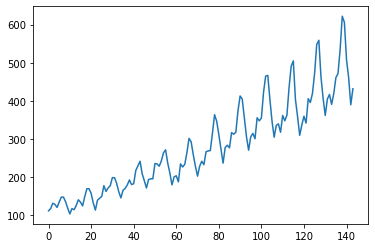

In [4]:
df['Passengers'].plot()

In [5]:
df['diff_shift_1'] = df['Passengers']-df['Passengers'].shift(1)
df['diff_shift_1']

0       NaN
1       6.0
2      14.0
3      -3.0
4      -8.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: diff_shift_1, Length: 144, dtype: float64

<AxesSubplot:>

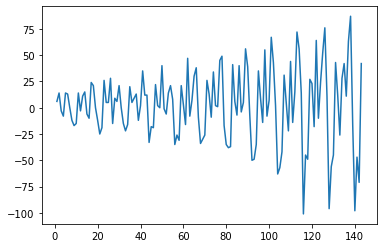

In [6]:
df['diff_shift_1'].plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['diff_shift_1'].dropna())

(-2.8292668241699888,
 0.054213290283826945,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [8]:
def adf_test(series):
    result = adfuller(series)
    print('p-value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, reject null hypothesis, indicating that data is stationary')
    else:
        print('Week evidence against the null hypothesis, accept null hypothesis, indicating that data is non stationary')

In [9]:
adf_test(df['diff_shift_1'].dropna())

p-value : 0.054213290283826945
Week evidence against the null hypothesis, accept null hypothesis, indicating that data is non stationary


In [10]:
df['diff_shift_2'] = df['diff_shift_1'] - df['diff_shift_1'].shift(1)
df['diff_shift_2']

0        NaN
1        NaN
2        8.0
3      -17.0
4       -5.0
       ...  
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: diff_shift_2, Length: 144, dtype: float64

<AxesSubplot:>

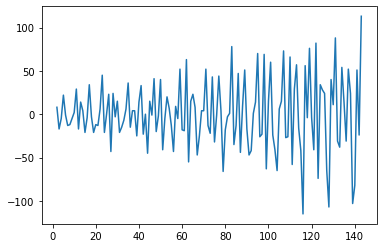

In [11]:
df['diff_shift_2'].dropna().plot()

In [12]:
df

,Month,Passengers,diff_shift_1,diff_shift_2
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,8.0
3,1949-04,129,-3.0,-17.0
4,1949-05,121,-8.0,-5.0
...,...,...,...,...
139,1960-08,606,-16.0,-103.0
140,1960-09,508,-98.0,-82.0
141,1960-10,461,-47.0,51.0
142,1960-11,390,-71.0,-24.0


In [13]:
adf_test((df['diff_shift_2']).dropna())

p-value : 2.732891850014085e-29
Strong evidence against the null hypothesis, reject null hypothesis, indicating that data is stationary


In [14]:
from statsmodels.tsa.ar_model import AutoReg

In [15]:
df1 = df['diff_shift_2'].dropna()
df1

2        8.0
3      -17.0
4       -5.0
5       22.0
6       -1.0
       ...  
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: diff_shift_2, Length: 142, dtype: float64

In [16]:
df1.shape

(142,)

In [17]:
# Deletes 7 rows from last and gives rest of the output
train = df1[:len(df1)-7]
train

2       8.0
3     -17.0
4      -5.0
5      22.0
6      -1.0
       ... 
132   -31.0
133   -38.0
134    54.0
135    14.0
136   -31.0
Name: diff_shift_2, Length: 135, dtype: float64

In [18]:
train.shape

(135,)

In [19]:
#Keeps rest of the rows excluding last 7 rows that are deleted
test = df1[len(df1)-7:]
test

137     52.0
138     24.0
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: diff_shift_2, dtype: float64

In [20]:
test.shape

(7,)

In [21]:
model = AutoReg(df['diff_shift_2'].dropna(), lags = 1).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [22]:
#pred = model.predict(start = len(train), end = len(df1) - 1)
pred = model.predict(start = 136, end = 142)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [23]:
pred.shape

(7,)

In [24]:
len(df1) - 1

141

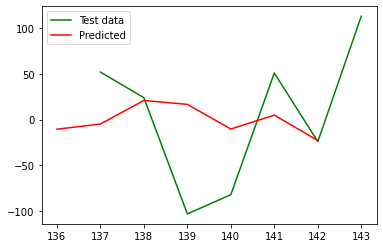

In [25]:
plt.plot(test, label = 'Test data', color = 'green')
plt.plot(pred, label = 'Predicted', color = 'red')
plt.legend()

In [26]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, pred))

In [27]:
rmse

86.90562287963606